# Look into the VespaG Training data

In [1]:
from Bio import SeqIO
import pandas as pd

In [2]:
training_data_path = '/mnt/f/nicole/vespag_fasta_training_datasets/vespag_fasta_training_datasets/seq_human5k.fasta'

def load_fasta(fasta_file):
    sequences = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequences.append({'id': record.id, 'seq': str(record.seq)})
    sequences = pd.DataFrame(sequences)
    return sequences

sequences = load_fasta(training_data_path)
print(sequences.shape)
sequences.head()

(5305, 2)


,id,seq
0,A0A075B6R0,MQWALAVLLAFLSPASQKSSNLEGRTKSVIRQTGSSAEITCDLAEG...
1,A0A075B6R2,MKHLWFFLLLVAAPRWVLSQVQLQESGPGLVKPSGTLSLTCAVSGG...
2,A0A087WTH1,MEDEEKAVEILGNTEAAHPPSPIRCCWLRLRCLAATSIICGCSCLG...
3,A0A087WWA1,MGPSRLVRGPRPQGMRSPYRRPGMGWPRPRFPRMFKCSRRRYQQGL...
4,A0A087WXM9,MWPLRVYTRKKREGQRLNLTPTPDLGSPAKAEAPPGSKRKGKVHGL...


In [3]:
# how many sequences have a length smaller than 1.000?
sequences['length'] = sequences['seq'].apply(len)
sequences[sequences['length'] < 1000].shape

(5281, 3)

<Axes: >

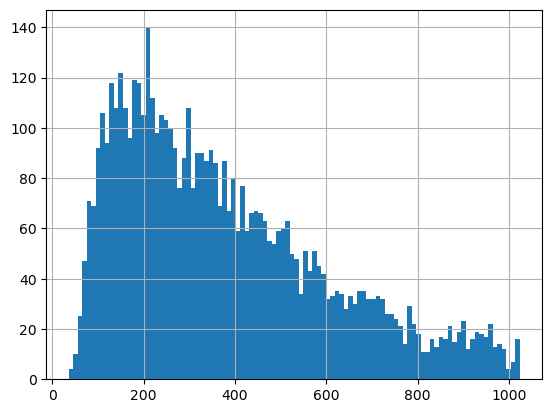

In [4]:
sequences.length.hist(bins=100)

## Use the VespaG training set as a training set for downstream tasks on the selected dimensions

In [6]:
# create a smaller training dataset that I can use for quick testing
small_set = sequences.sample(500)
small_set.head()

,id,seq,length
3454,Q8WV19,MEKLRRVLSGQDDEEQGLTAQVLDASSLSFNTRLKWFAICFVCGVF...,159
4251,Q9BXQ6,MRPALGHPRSVSSASGSFPPPPAAARLQPLFLRGGSFRGRRGSGDS...,578
2030,Q494V2,MSEIPSTIVSKNMTNDKNSLESMNISSSSSTEENPKKQARKNEEHG...,611
3337,Q8TAT8,MTERRRALSLAAVVDSINLACVVVSRDWLSLVPAFFYSPPPGGSFS...,98
3153,Q8N8Q3,MALEAAGGPPEETLSLWKREQARLKAHVVDRDTEAWQRDPAFSGLQ...,282


In [14]:
# generate batches of 1000 sequences
batch_size = 1000

for i in range(0, len(sequences), batch_size):
    batch = sequences[i:i+batch_size]
    file_path = f'/mnt/f/nicole/human5k/seq_human{i}.fasta'
    with open(file_path, 'w') as f:
        for index, row in batch.iterrows():
            f.write(f'>{row.id}\n{row.seq}\n')